# Pizza Price Prediction (Playground Data)

This dataset I made is for predicting the prices of pizza, the dataset is not complete at all, but you can use this dataset for learning or study or maybe you want to upgrade the data by yourself, is okay for me, hopefully, this dataset is useful for you guys, and use this dataset wisely.

https://www.kaggle.com/datasets/knightbearr/pizza-price-prediction?resource=download

Github link: Pizza Price Dataset <https://github.com/knightbearr/Guessing-Prices-Pizza>

Notebook: Pizza Price Prediction V.2.0 <https://www.kaggle.com/knightbearr/pizza-price-prediction-xgb-knightbearr>

Web Application: Pizza Price Prediction Web Application <https://share.streamlit.io/knightbearr/pizza-price-prediction-web-application/main/main.py>

If you want to know version 1 of my pizza dataset, you can see version 5 in my notebook, thanks in advance!

## 1.1 Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('pizza_v1.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


## 1.2 Pré processamento dos dados

In [4]:
# Remover "Rp" e a vísgula da coluna "price_rupiah"
df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',', '')

In [5]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes
3,A,155000,14.0,smoked beef,double_signature,reguler,yes,no
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no


In [7]:
# Verificar os número de valores únicos no tipo de dados do objeto
df.select_dtypes(include='object').nunique()

company          5
price_rupiah    43
topping         12
variant         20
size             6
extra_sauce      2
extra_cheese     2
dtype: int64

In [8]:
# converter a coluna "Valor" para inteiro
df['price_rupiah'] = df['price_rupiah'].astype(int)

## 1.3 Variações de Segmento de Pizza

In [9]:
df.variant.unique()

array(['double_signature', 'american_favorite', 'super_supreme',
       'meat_lovers', 'double_mix', 'classic', 'crunchy', 'new_york',
       'double_decker', 'spicy_tuna', 'BBQ_meat_fiesta', 'BBQ_sausage',
       'extravaganza', 'meat_eater', 'gournet_greek', 'italian_veggie',
       'thai_veggie', 'american_classic', 'neptune_tuna', 'spicy tuna'],
      dtype=object)

In [10]:
# definir função para segmentar nomes de pizza em tipos
def segment_variant(variant):
    if 'veggie' in variant:
        return 'Vegetarian'
    elif 'meat' in variant or 'BBQ' in variant:
        return 'Meat'
    elif 'tuna' in variant:
        return 'Seafood'
    else:
        return 'Other'

#aplique a função à coluna 'Pizza Name' para criar uma nova coluna 'Pizza Type'
df['variant'] = df['variant'].apply(segment_variant)

<Axes: >

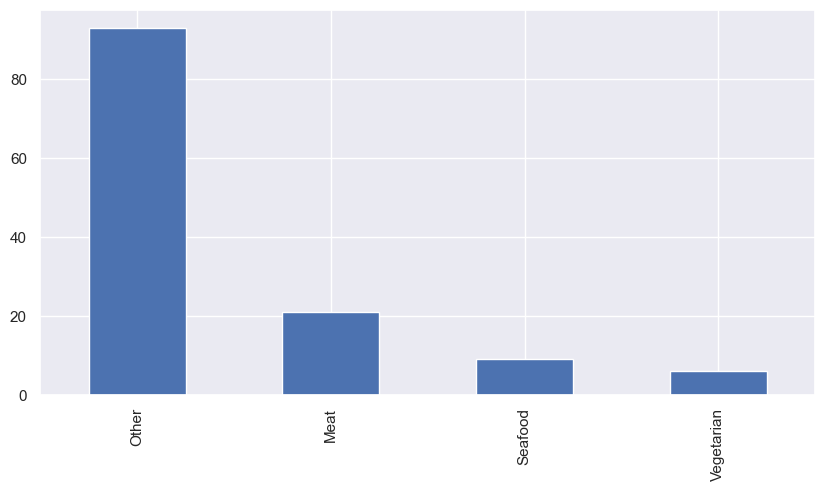

In [11]:
plt.figure(figsize=(10,5))
df['variant'].value_counts().plot(kind='bar')

# 2.0 Análise exploratória dos dados

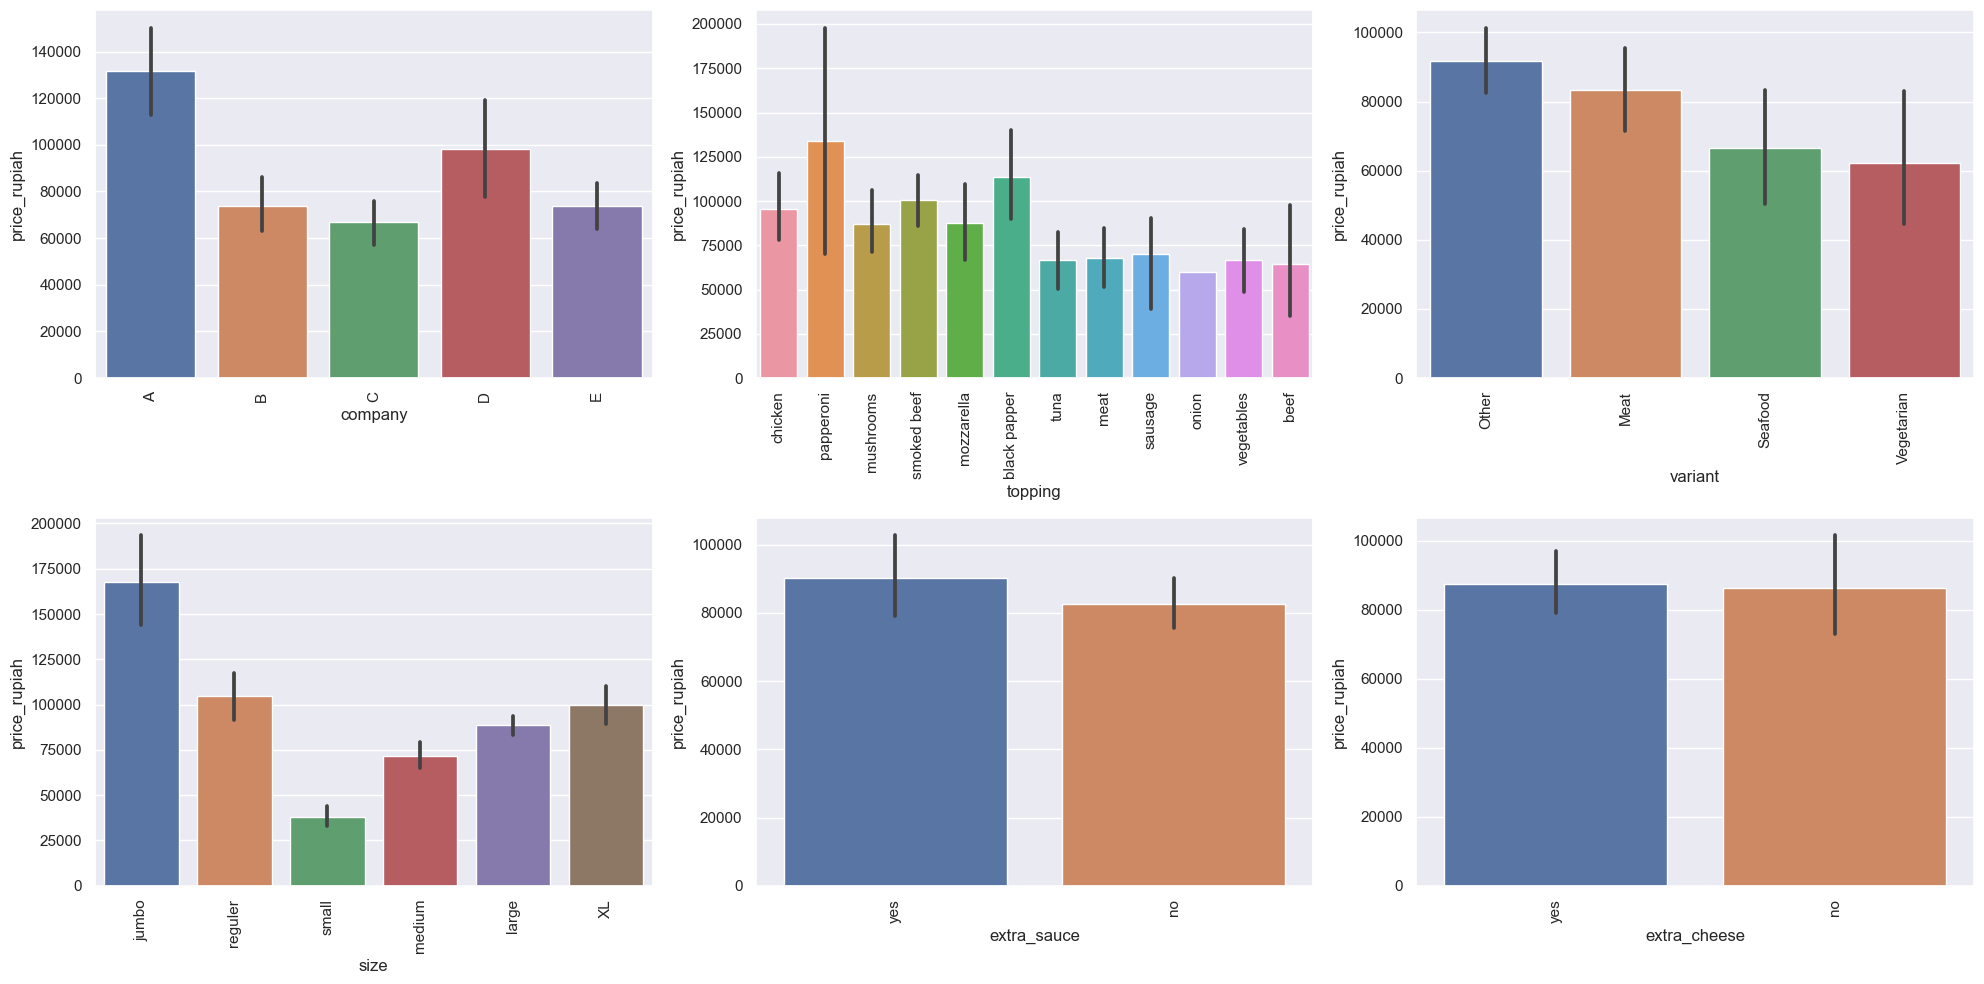

In [12]:
# lista de variaveis categóricas para plotar no gráfico
cat_vars = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese']

# criar figura
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.ravel()

# criar barplot para cada variável categórica
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='price_rupiah', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# ajuste do espaçamento
fig.tight_layout()

# Mostar gráficos
plt.show()

<Axes: xlabel='diameter'>

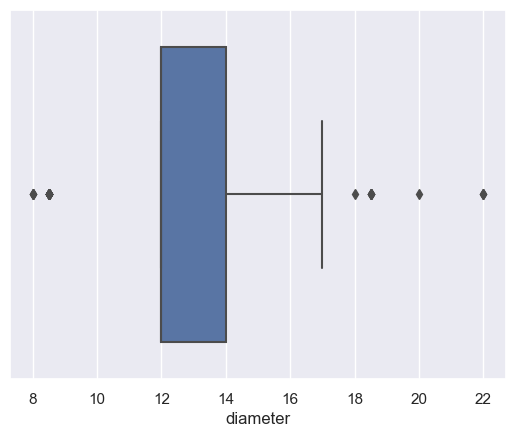

In [13]:
sns.boxplot(x='diameter', data=df)

<Axes: xlabel='diameter'>

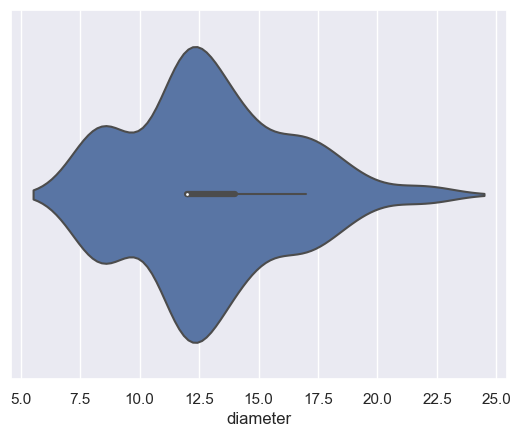

In [14]:
sns.violinplot(x='diameter', data=df)

<Axes: xlabel='diameter', ylabel='price_rupiah'>

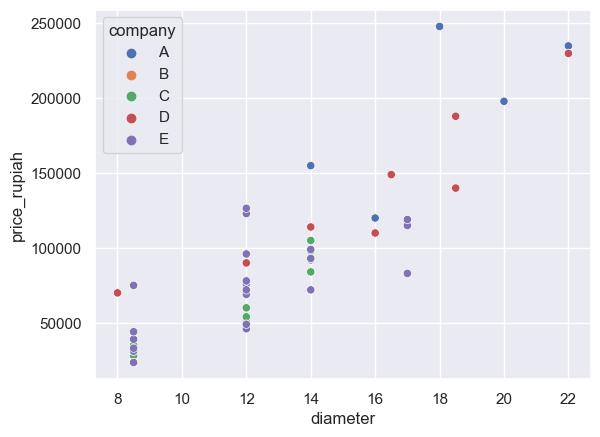

In [15]:
sns.scatterplot(data=df, x="diameter", y="price_rupiah", hue="company")

## 2.1 Pré processamento - parte 2

In [17]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,Other,jumbo,yes,yes
1,A,198000,20.0,papperoni,Other,jumbo,yes,yes
2,A,120000,16.0,mushrooms,Other,reguler,yes,yes
3,A,155000,14.0,smoked beef,Other,reguler,yes,no
4,A,248000,18.0,mozzarella,Other,jumbo,yes,no


In [18]:
# Verificando dados faltantes
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

### 2.2.1 Codificação de rótulo para tipo de dados de objeto

In [20]:
# Faça um loop em cada coluna no DataFrame onde dtype é 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Imprima o nome da coluna e os valores exclusivos
    print(f"{col}: {df[col].unique()}")

company: ['A' 'B' 'C' 'D' 'E']
topping: ['chicken' 'papperoni' 'mushrooms' 'smoked beef' 'mozzarella'
 'black papper' 'tuna' 'meat' 'sausage' 'onion' 'vegetables' 'beef']
variant: ['Other' 'Meat' 'Seafood' 'Vegetarian']
size: ['jumbo' 'reguler' 'small' 'medium' 'large' 'XL']
extra_sauce: ['yes' 'no']
extra_cheese: ['yes' 'no']


In [21]:
from sklearn import preprocessing

# Faça um loop em cada coluna no DataFrame onde dtype é 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Inicializar um objeto LabelEncoder
    label_encoder = preprocessing.LabelEncoder()
    
    # Ajuste o codificador aos valores exclusivos na coluna
    label_encoder.fit(df[col].unique())
    
    # Transforme a coluna usando o codificador
    df[col] = label_encoder.transform(df[col])
    
    # Imprima o nome da coluna e os valores codificados exclusivos
    print(f"{col}: {df[col].unique()}")

company: [0 1 2 3 4]
topping: [ 2  7  5  9  4  1 10  3  8  6 11  0]
variant: [1 0 2 3]
size: [1 4 5 3 2 0]
extra_sauce: [1 0]
extra_cheese: [1 0]
